## **Data**

In [1]:
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 70.4MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('./SalesPrediction.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


## **EDA**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


### **One-hot encoding**

In [6]:
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


### **Handling missing values**

In [7]:
df.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Sales,6
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


**Replace all Null elements with 0s**

In [8]:
df = df.fillna(0)
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


**Replace all Null elements with Meam values**

In [9]:
df = df.fillna(df.mean())
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [10]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


### **Correlation**

In [11]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.860518,0.522565,0.988570,0.018567,-0.012019,-0.004298,-0.002073
Radio,0.860518,1.000000,0.604450,0.863790,0.009486,-0.004108,0.003270,-0.008591
Social Media,0.522565,0.604450,1.000000,0.526777,0.010449,0.012691,-0.012148,-0.010959
Sales,0.988570,0.863790,0.526777,1.000000,0.019709,-0.012167,-0.003555,-0.003807
Influencer_Macro,0.018567,0.009486,0.010449,0.019709,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012019,-0.004108,0.012691,-0.012167,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004298,0.003270,-0.012148,-0.003555,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.002073,-0.008591,-0.010959,-0.003807,-0.328482,-0.335465,-0.334495,1.000000


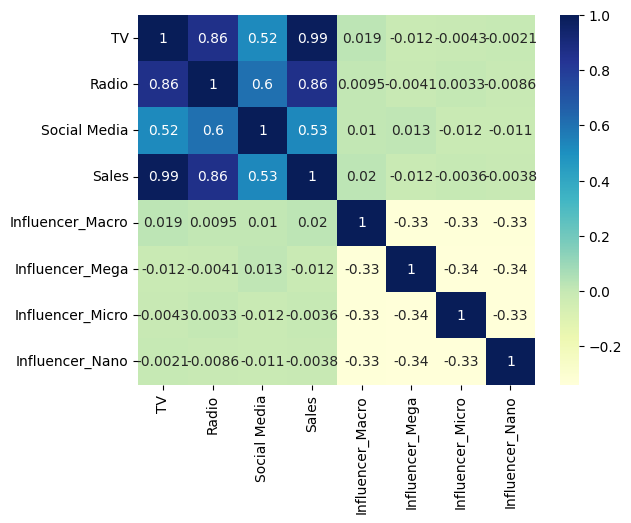

In [12]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
df[['TV', 'Radio', 'Social Media', 'Sales']].corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.860518,0.522565,0.988570
Radio,0.860518,1.000000,0.604450,0.863790
Social Media,0.522565,0.604450,1.000000,0.526777
Sales,0.988570,0.863790,0.526777,1.000000


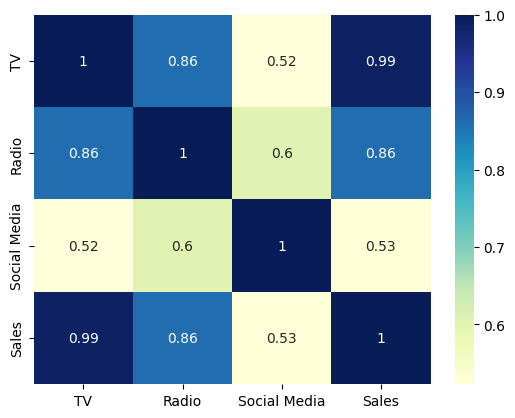

In [14]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

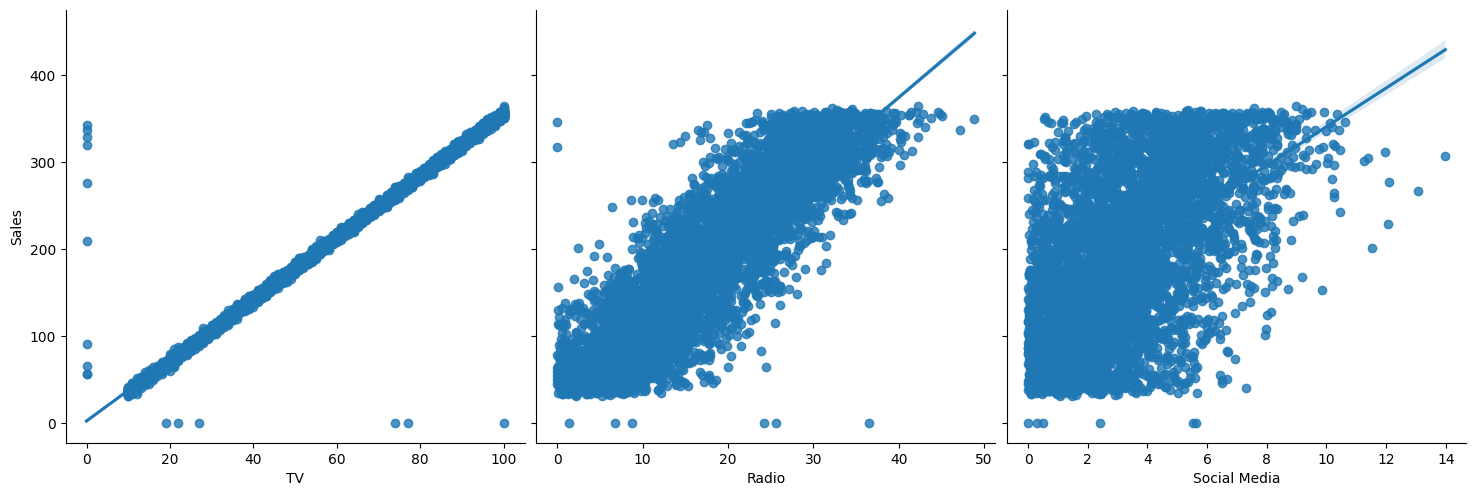

In [15]:
sns.pairplot(data = df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

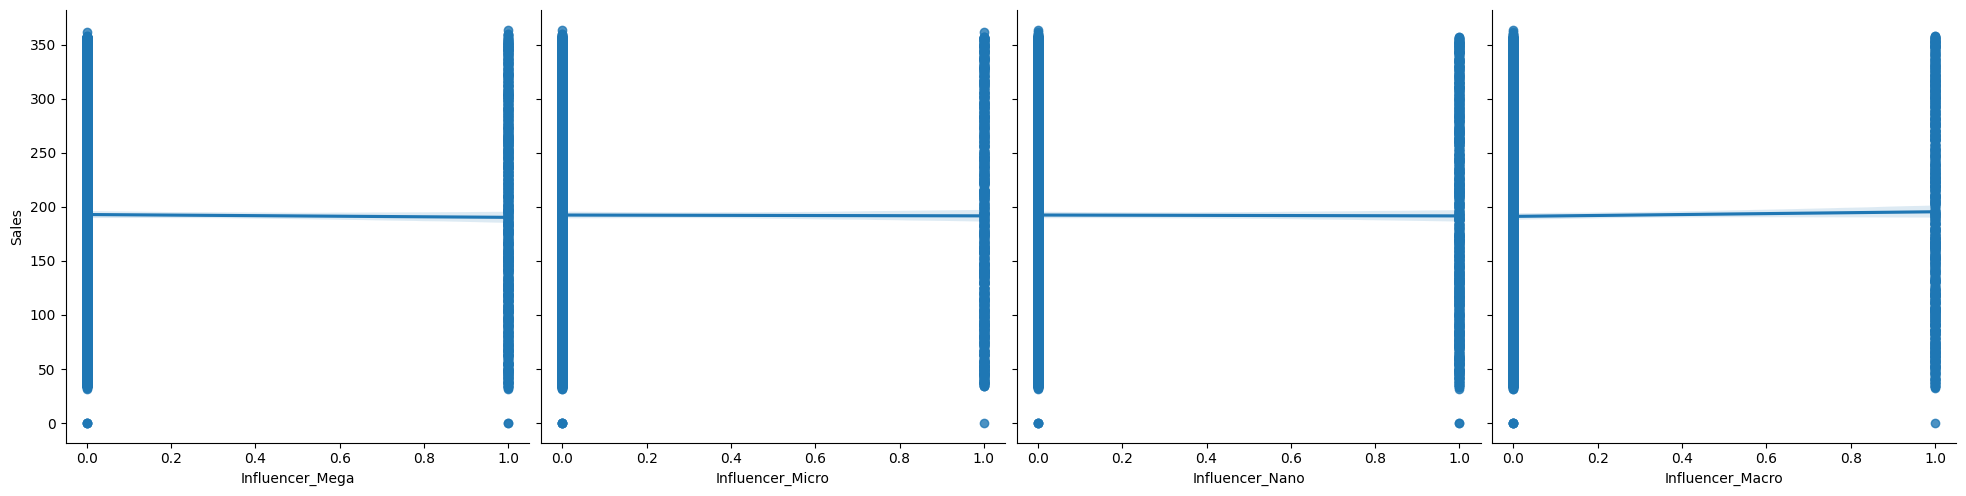

In [16]:
sns.pairplot(data = df,
    x_vars = ['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

## **Train & Test Split**

In [17]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [18]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro','Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]

In [19]:
X

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,False,False,True,False
4568,71.0,20.610685,6.545573,False,False,False,True
4569,44.0,19.800072,5.096192,False,False,True,False
4570,71.0,17.534640,1.940873,True,False,False,False


In [20]:
y = df[['Sales']]
y

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
...,...
4567,94.685866
4568,249.101915
4569,163.631457
4570,253.610411


In [21]:
X.shape, y.shape

((4572, 7), (4572, 1))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)

In [23]:
X_train.shape, X_test.shape

((3063, 7), (1509, 7))

In [24]:
y_train.shape, y_test.shape

((3063, 1), (1509, 1))

## **Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [26]:
scaler.mean_

array([53.9970617 , 18.22209011,  3.33487105,  0.24779628,  0.25138753,
        0.25008162,  0.25073457])

In [27]:
scaler.scale_

array([26.24285095,  9.6336957 ,  2.21929717,  0.43173288,  0.43381083,
        0.43305981,  0.43343598])

In [28]:
X_test_processed = scaler.transform(X_test)

In [29]:
X_train_processed.shape

(3063, 7)

In [30]:
X_test_processed.shape

(1509, 7)

In [31]:
X_train_processed

array([[ 0.34306251, -0.39269809, -0.17117575, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-0.19041611, -0.28821416, -1.47454833, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.41904981, -1.07312224, -0.55726535, ..., -0.57948652,
        -0.57747593,  1.72866459],
       ...,
       [-1.6003239 , -1.72760008,  0.58703816, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [-0.57147227, -0.9126861 , -1.22457248, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-1.25737336, -1.45632493, -1.04684805, ..., -0.57948652,
         1.73167391, -0.57848122]])

In [32]:
X_test_processed

array([[-0.34283858, -0.11361891, -0.84351677, ..., -0.57948652,
         1.73167391, -0.57848122],
       [ 0.76222428,  1.17276695, -0.45136527, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [ 1.14328044,  1.04152694,  1.06570814, ...,  1.72566569,
        -0.57747593, -0.57848122],
       ...,
       [ 0.95275236,  1.11773825,  1.06866838, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.41904981, -0.32445517,  1.20063234, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.91442282, -1.25598448, -0.32806086, ...,  1.72566569,
        -0.57747593, -0.57848122]])

##Linear Regression

In [33]:
from sklearn.metrics import r2_score

In [34]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        try:
            y_pred = X_data.dot(self.theta)
        except:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [35]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 45309.21849560186
Epoch: 50 - Loss: 234.37488471504912
Epoch: 100 - Loss: 213.60946625065637
Epoch: 150 - Loss: 212.24242349501193
Epoch: 200 - Loss: 212.15236148595488


{'loss': 703.4652847425183,
 'weight': array([[ 1.92762097e+02],
        [ 8.60124025e+01],
        [ 6.91811018e+00],
        [ 2.07696634e-01],
        [ 2.93933871e-01],
        [ 2.25885132e-01],
        [ 1.76700858e-01],
        [-4.07487490e-02]])}

In [36]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9820742772490672

**Sklearn**

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [38]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9820910569999272

## **Polynomial Regression**

### **Create polynomial features**

In [39]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [40]:
X_train_poly = create_polynomial_features(X_train_processed, degree=2)
X_train_poly

array([[ 0.34306251,  0.11769189, -0.39269809, ...,  2.99869452,
        -0.57848122,  0.33464052],
       [-0.19041611,  0.0362583 , -0.28821416, ...,  0.33347845,
        -0.57848122,  0.33464052],
       [-0.41904981,  0.17560274, -1.07312224, ...,  0.33347845,
         1.72866459,  2.98828125],
       ...,
       [-1.6003239 ,  2.5610366 , -1.72760008, ...,  0.33347845,
         1.72866459,  2.98828125],
       [-0.57147227,  0.32658056, -0.9126861 , ...,  2.99869452,
        -0.57848122,  0.33464052],
       [-1.25737336,  1.58098777, -1.45632493, ...,  2.99869452,
        -0.57848122,  0.33464052]])

In [41]:
X_test_poly = create_polynomial_features(X_test_processed, degree=2)
X_test_poly

array([[-0.34283858,  0.11753829, -0.11361891, ...,  2.99869452,
        -0.57848122,  0.33464052],
       [ 0.76222428,  0.58098586,  1.17276695, ...,  0.33347845,
         1.72866459,  2.98828125],
       [ 1.14328044,  1.30709017,  1.04152694, ...,  0.33347845,
        -0.57848122,  0.33464052],
       ...,
       [ 0.95275236,  0.90773707,  1.11773825, ...,  0.33347845,
        -0.57848122,  0.33464052],
       [-0.41904981,  0.17560274, -0.32445517, ...,  0.33347845,
        -0.57848122,  0.33464052],
       [-0.91442282,  0.83616909, -1.25598448, ...,  0.33347845,
        -0.57848122,  0.33464052]])

In [42]:
X_train_poly.shape, X_test_poly.shape

((3063, 14), (1509, 14))

In [43]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [44]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9811798741993042

### **Using Sklearn**

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [46]:
X_train_poly

array([[ 1.        ,  0.34306251, -0.39269809, ...,  2.99869452,
        -1.00174084,  0.33464052],
       [ 1.        , -0.19041611, -0.28821416, ...,  0.33347845,
         0.33405898,  0.33464052],
       [ 1.        , -0.41904981, -1.07312224, ...,  0.33347845,
        -0.99826219,  2.98828125],
       ...,
       [ 1.        , -1.6003239 , -1.72760008, ...,  0.33347845,
        -0.99826219,  2.98828125],
       [ 1.        , -0.57147227, -0.9126861 , ...,  2.99869452,
        -1.00174084,  0.33464052],
       [ 1.        , -1.25737336, -1.45632493, ...,  2.99869452,
        -1.00174084,  0.33464052]])

In [47]:
X_test_poly = poly_features.transform(X_test_processed)

In [48]:
X_test_poly

array([[ 1.        , -0.34283858, -0.11361891, ...,  2.99869452,
        -1.00174084,  0.33464052],
       [ 1.        ,  0.76222428,  1.17276695, ...,  0.33347845,
        -0.99826219,  2.98828125],
       [ 1.        ,  1.14328044,  1.04152694, ...,  0.33347845,
         0.33405898,  0.33464052],
       ...,
       [ 1.        ,  0.95275236,  1.11773825, ...,  0.33347845,
         0.33405898,  0.33464052],
       [ 1.        , -0.41904981, -0.32445517, ...,  0.33347845,
         0.33405898,  0.33464052],
       [ 1.        , -0.91442282, -1.25598448, ...,  0.33347845,
         0.33405898,  0.33464052]])

In [49]:
X_train_poly.shape, X_test_poly.shape

((3063, 36), (1509, 36))

In [50]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9785743009106321

### ***Custom polynomial features***

In [52]:
X_train_processed[:, 2:3]

array([[-0.17117575],
       [-1.47454833],
       [-0.55726535],
       ...,
       [ 0.58703816],
       [-1.22457248],
       [-1.04684805]])

In [53]:
x_train_poly = create_polynomial_features(X_train_processed[:, 2:3], degree=2)
x_train_poly

array([[-0.17117575,  0.02930114],
       [-1.47454833,  2.17429276],
       [-0.55726535,  0.31054467],
       ...,
       [ 0.58703816,  0.3446138 ],
       [-1.22457248,  1.49957777],
       [-1.04684805,  1.09589085]])

In [54]:
X_train_poly = np.hstack((X_train_processed, x_train_poly[:, 1:]))
X_train_poly

array([[ 0.34306251, -0.39269809, -0.17117575, ...,  1.73167391,
        -0.57848122,  0.02930114],
       [-0.19041611, -0.28821416, -1.47454833, ..., -0.57747593,
        -0.57848122,  2.17429276],
       [-0.41904981, -1.07312224, -0.55726535, ..., -0.57747593,
         1.72866459,  0.31054467],
       ...,
       [-1.6003239 , -1.72760008,  0.58703816, ..., -0.57747593,
         1.72866459,  0.3446138 ],
       [-0.57147227, -0.9126861 , -1.22457248, ...,  1.73167391,
        -0.57848122,  1.49957777],
       [-1.25737336, -1.45632493, -1.04684805, ...,  1.73167391,
        -0.57848122,  1.09589085]])

In [55]:
x_test_poly = create_polynomial_features(X_test_processed[:, 2:3], degree=2)
X_test_poly = np.hstack((X_test_processed, x_test_poly[:, 1:]))
X_test_poly

array([[-0.34283858, -0.11361891, -0.84351677, ...,  1.73167391,
        -0.57848122,  0.71152054],
       [ 0.76222428,  1.17276695, -0.45136527, ..., -0.57747593,
         1.72866459,  0.20373061],
       [ 1.14328044,  1.04152694,  1.06570814, ..., -0.57747593,
        -0.57848122,  1.13573384],
       ...,
       [ 0.95275236,  1.11773825,  1.06866838, ..., -0.57747593,
        -0.57848122,  1.14205211],
       [-0.41904981, -0.32445517,  1.20063234, ..., -0.57747593,
        -0.57848122,  1.44151802],
       [-0.91442282, -1.25598448, -0.32806086, ..., -0.57747593,
        -0.57848122,  0.10762393]])

In [56]:
X_train_poly.shape, X_test_poly.shape

((3063, 8), (1509, 8))

In [57]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [58]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9820873203866817